In [1]:
import pandas as pd
import json
import os 
import sys

# plot
import matplotlib.pyplot as plt
import seaborn as sns

### global variables for running the code

In [2]:
run_timesteps = 50000

In [3]:
# dir = os.path.join('dataset', 'kaggle-dse')
# dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/kaggle-dse"

if os.name == 'nt':  # Windows
    dir = r"D:\Academics\4-2\19 Batch\Sessionals\CSE 472\Project\1905095_1905115\Github\Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models\datasets\kaggle-dse"
else:  # macOS/Linux
    dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/kaggle-dse"


files = os.listdir(dir)
files.sort()
files = [f for f in files]
print(files)

['prices_2008.json', 'prices_2009.json', 'prices_2010.json', 'prices_2011.json', 'prices_2012.json', 'prices_2013.json', 'prices_2014.json', 'prices_2015.json', 'prices_2016.json', 'prices_2017.json', 'prices_2018.json', 'prices_2019.json', 'prices_2020.json', 'prices_2021.json', 'prices_2022.json', 'securities.json']


In [4]:
# load all the json files
data = []
for f in files:
    with open(os.path.join(dir, f)) as file:
        data.append(json.load(file))
len(data)

16

In [5]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [6]:
df.shape

(1716441, 13)

In [7]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,sector,instrument_type
0,2009-12-30 00:00:00,1STBSRS,1250.0,1290.0,1236.0,1280.00,1253.00,1283.25,67.0,5.4105,4250.0,NaN,NaN
1,2009-12-29 00:00:00,1STBSRS,1253.0,1311.0,1250.0,1250.00,1283.25,1166.25,99.0,7.0714,5500.0,NaN,NaN
2,2009-12-27 00:00:00,1STBSRS,1185.0,1250.0,1159.5,1250.00,1166.25,1325.00,429.0,36.9989,31650.0,NaN,NaN
3,2009-12-24 00:00:00,1STBSRS,1325.0,1482.0,1325.0,1482.00,1325.00,1514.25,323.0,25.7783,19000.0,NaN,NaN
4,2009-12-23 00:00:00,1STBSRS,1530.0,1569.0,1502.0,1541.75,1514.25,1550.50,33.0,3.4342,2250.0,NaN,NaN


In [8]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'trading_code'])
print(df['trading_code'].value_counts())

trading_code
STANCERAM      3333
JAMUNABANK     3333
JANATAINS      3333
KARNAPHULI     3333
KAY&QUE        3333
               ... 
 MAKSONSPIN       1
 KAY&QUE          1
 KBPPWBIL         1
 MATINSPINN       1
 WMSHIPYARD       1
Name: count, Length: 1592, dtype: int64


In [9]:
top_companies = [
    "GP",
    "BATBC",
    "SQURPHARMA",
    "BEXIMCO",
    "BERGERPBL",
    "MARICO",
    "BRACBANK",
    "BXPHARMA",
    "ISLAMIBANK",
    "DUTCHBANGL",
    "EBL",
    "POWERGRID",
    "SUMITPOWER",
    "OLYMPIC",
    "PUBALIBANK",
    "CITYBANK",
    "ALARABANK",
    "PRIMEBANK",
    "IFIC",
    "RECKITTBEN",
    "NBL",
    "BSRMSTEEL",
    "BANKASIA",
    "SHAHJABANK",
    "MPETROLEUM",
    "LINDEBD",
    "BSC",
    "JAMUNAOIL",
    "PADMAOIL",
    "SINGERBD",
    "ACI",
    "IBNSINA",
    "HRTEX",
    "SOUTHEASTB",
    "APEXFOODS",
    "SALAMCRST",
    "FEDERALINS",
    "DESCO",
    "BATASHOE",
]

len(top_companies)

39

In [10]:
new_df = df[df['trading_code'].isin(top_companies)]

new_df['date'].value_counts()

date
2009-12-30 00:00:00    39
2017-04-20 00:00:00    39
2018-10-09 00:00:00    39
2018-10-08 00:00:00    39
2018-10-07 00:00:00    39
                       ..
2009-01-06 00:00:00    36
2009-01-05 00:00:00    36
2009-01-04 00:00:00    36
2009-01-01 00:00:00    36
2009-01-15 00:00:00    36
Name: count, Length: 3333, dtype: int64

In [11]:
new_df['trading_code'].value_counts()

trading_code
ACI           3333
POWERGRID     3333
ISLAMIBANK    3333
JAMUNAOIL     3333
LINDEBD       3333
MPETROLEUM    3333
NBL           3333
OLYMPIC       3333
PADMAOIL      3333
PRIMEBANK     3333
ALARABANK     3333
PUBALIBANK    3333
RECKITTBEN    3333
SALAMCRST     3333
SHAHJABANK    3333
SINGERBD      3333
SOUTHEASTB    3333
SQURPHARMA    3333
IFIC          3333
IBNSINA       3333
HRTEX         3333
BSC           3333
APEXFOODS     3333
BANKASIA      3333
BATASHOE      3333
BATBC         3333
BERGERPBL     3333
BEXIMCO       3333
BRACBANK      3333
SUMITPOWER    3333
BXPHARMA      3333
CITYBANK      3333
DESCO         3333
DUTCHBANGL    3333
EBL           3333
FEDERALINS    3333
BSRMSTEEL     3323
MARICO        3155
GP            3119
Name: count, dtype: int64

In [12]:
df = new_df

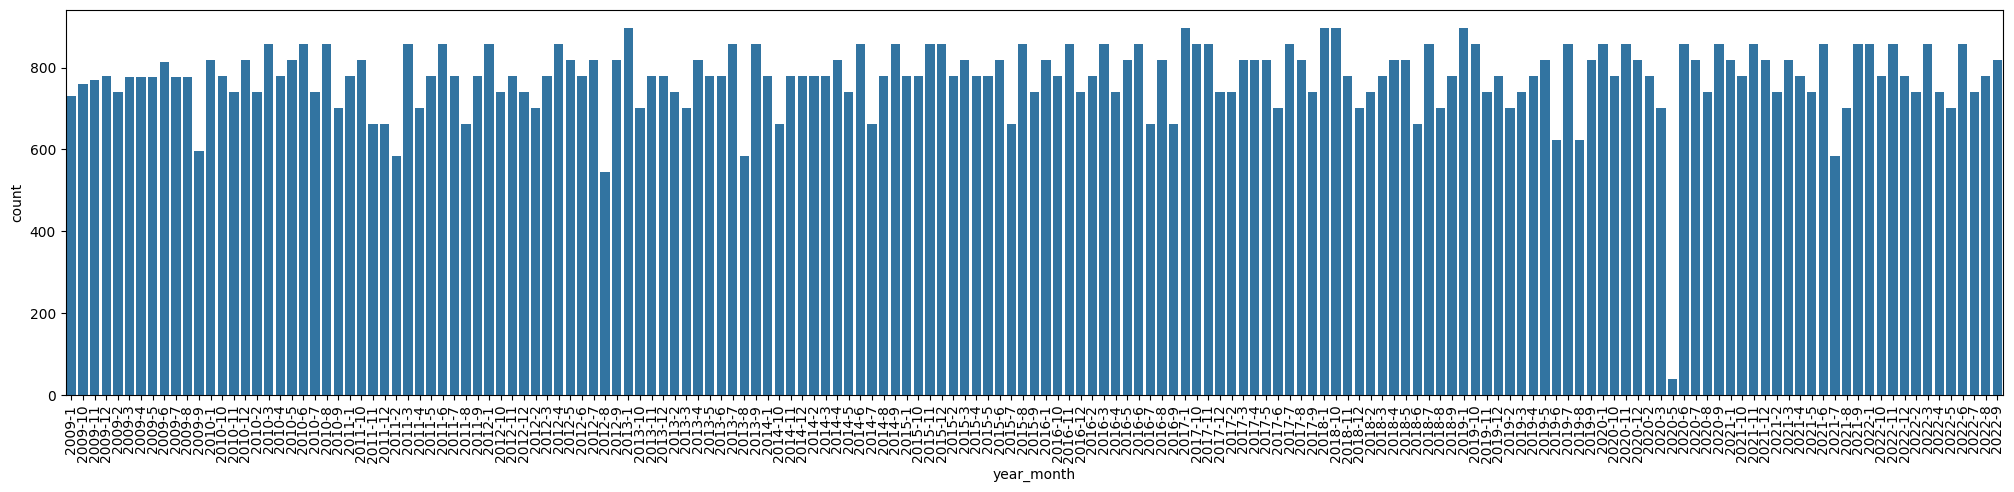

In [13]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [14]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1880
high                        1880
low                         1880
opening_price                717
closing_price                 36
yesterdays_closing_price       0
trade                       1883
value_mn                    1931
volume                      1883
sector                         0
instrument_type                0
year                           0
month                          0
year_month                     0
dtype: int64


In [15]:
# Calculate the mean values of each month for the columns high, low, opening, and closing
# mean_values = df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening', 'closing']].mean()
# Replace the zero values with the mean values
new_df = df.copy()
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1880
high                         312
low                          312
opening_price                 17
closing_price                  0
yesterdays_closing_price       0
trade                       1883
value_mn                    1931
volume                      1883
sector                         0
instrument_type                0
year                           0
month                          0
year_month                     0
dtype: int64


In [16]:
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1880
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1883
value_mn                    1931
volume                      1883
sector                         0
instrument_type                0
year                           0
month                          0
year_month                     0
dtype: int64


In [17]:
df = new_df.copy()

In [18]:
df['year'].value_counts()

year
2017    9672
2010    9516
2015    9516
2022    9516
2018    9438
2016    9399
2021    9360
2013    9282
2014    9282
2012    9243
2019    9243
2009    9075
2011    8931
2020    8112
Name: count, dtype: int64

In [19]:
df['trading_code'].value_counts()

trading_code
ACI           3333
POWERGRID     3333
ISLAMIBANK    3333
JAMUNAOIL     3333
LINDEBD       3333
MPETROLEUM    3333
NBL           3333
OLYMPIC       3333
PADMAOIL      3333
PRIMEBANK     3333
ALARABANK     3333
PUBALIBANK    3333
RECKITTBEN    3333
SALAMCRST     3333
SHAHJABANK    3333
SINGERBD      3333
SOUTHEASTB    3333
SQURPHARMA    3333
IFIC          3333
IBNSINA       3333
HRTEX         3333
BSC           3333
APEXFOODS     3333
BANKASIA      3333
BATASHOE      3333
BATBC         3333
BERGERPBL     3333
BEXIMCO       3333
BRACBANK      3333
SUMITPOWER    3333
BXPHARMA      3333
CITYBANK      3333
DESCO         3333
DUTCHBANGL    3333
EBL           3333
FEDERALINS    3333
BSRMSTEEL     3323
MARICO        3155
GP            3119
Name: count, dtype: int64

The goal is to:
Sample 208 unique days for each year in the dataset.
Ensure that for each sampled day, data is available for all 30 trading codes (stocks or financial instruments).
Combine the sampled data into a final dataset.

In [20]:
# df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample 200 days for each year
for year, group in grouped_data:
    # Sample 200 unique days
    for t, g in group.groupby('trading_code'):
        sampled_days = g['date'].sample(208, replace=False)
        break
    # check the number of unique days
    print(len(sampled_days.unique()))
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    # print(len(sampled_year_data))
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

208
208
208
208
208
208
208
208
208
208
208
208
208
208


In [21]:
sampled_data['year'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:

# change the zero values of the columns volume to hundred
df['volume'] = df['volume'].replace(0, 100)

In [23]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1880
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1883
value_mn                    1931
volume                         0
sector                         0
instrument_type                0
year                           0
month                          0
year_month                     0
dtype: int64


In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/ml/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [25]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [26]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,sector,instrument_type,year,month,year_month
2633,2009-12-30,ACI,447.9,450.0,445.1,449.8,446.9,446.3,1068.0,50.4364,112550.0,NaN,NaN,2009,12,2009-12
2634,2009-12-29,ACI,447.5,449.6,443.0,443.0,446.3,442.5,1100.0,58.6757,131200.0,NaN,NaN,2009,12,2009-12
2635,2009-12-27,ACI,442.4,443.4,438.0,438.0,442.5,437.3,529.0,25.0689,56950.0,NaN,NaN,2009,12,2009-12
2636,2009-12-24,ACI,439.0,441.0,434.5,436.9,437.3,433.0,499.0,22.7621,51950.0,NaN,NaN,2009,12,2009-12
2637,2009-12-23,ACI,434.0,439.7,431.1,436.9,433.0,433.5,551.0,26.8749,61850.0,NaN,NaN,2009,12,2009-12


In [27]:
df.drop(['year_month', 'last_traded_price', 'trade', 'value_mn','yesterdays_closing_price','month','year'], axis=1, inplace=True)
df.rename(columns={'trading_code': 'tic', 'opening_price': 'open', 'closing_price': 'close'}, inplace=True)
df.head()

,date,tic,high,low,open,close,volume,sector,instrument_type
2633,2009-12-30,ACI,450.0,445.1,449.8,446.9,112550.0,NaN,NaN
2634,2009-12-29,ACI,449.6,443.0,443.0,446.3,131200.0,NaN,NaN
2635,2009-12-27,ACI,443.4,438.0,438.0,442.5,56950.0,NaN,NaN
2636,2009-12-24,ACI,441.0,434.5,436.9,437.3,51950.0,NaN,NaN
2637,2009-12-23,ACI,439.7,431.1,436.9,433.0,61850.0,NaN,NaN


In [28]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
if os.name == 'nt':  # Windows
    # plt.savefig('Output\std_dev.png')
    do_nothing = 1
else:
    plt.savefig('Output/output_dse.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_76476/1273404779.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [29]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [30]:
df.dtypes

date                datetime64[ns]
tic                         object
high                       float64
low                        float64
open                       float64
close                      float64
volume                     float64
sector                      object
instrument_type             object
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [31]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [32]:
print(df.shape)
df.head()

(129585, 14)


,date,tic,high,low,open,close,volume,sector,instrument_type,day,short_resistance,short_support,long_resistance,long_support
0,2009-01-01,ACI,537.90,519.00,525.0,526.10,305400.0,NaN,NaN,3,545.00,497.1,545.00,435.185714
1,2009-01-01,ALARABANK,444.50,426.50,444.5,433.00,19550.0,NaN,NaN,3,444.50,415.0,444.50,343.250000
2,2009-01-01,APEXFOODS,885.00,837.50,855.0,844.75,1900.0,NaN,NaN,3,979.00,837.5,1150.00,763.000000
3,2009-01-01,BANKASIA,388.75,371.25,385.0,373.25,7600.0,NaN,NaN,3,388.75,320.0,388.75,302.000000
4,2009-01-01,BATASHOE,330.00,320.00,320.0,326.80,22500.0,NaN,NaN,3,351.90,317.4,355.00,306.000000


In [33]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

3333


In [34]:
turbulence_index['turbulence'].max()

12007.362114149953

In [35]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

df['tic'].nunique()

39

In [36]:
df['tic'].nunique()
df.shape

(129585, 15)

In [37]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_76476/3616578483.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(value = 0)


Successfully added technical indicators


In [38]:
processed['tic'].nunique()


36

In [39]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [40]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(119988, 23)


,date,tic,high,low,open,close,volume,sector,instrument_type,day,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-01,ACI,537.90,519.00,525.00,526.10,305400.0,0.0,0.0,3.0,...,435.185714,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,526.10,526.10
1,2009-01-01,ALARABANK,444.50,426.50,444.50,433.00,19550.0,0.0,0.0,3.0,...,343.250000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,433.00,433.00
2,2009-01-01,APEXFOODS,885.00,837.50,855.00,844.75,1900.0,0.0,0.0,3.0,...,763.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,844.75,844.75
3,2009-01-01,BANKASIA,388.75,371.25,385.00,373.25,7600.0,0.0,0.0,3.0,...,302.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,373.25,373.25
4,2009-01-01,BATASHOE,330.00,320.00,320.00,326.80,22500.0,0.0,0.0,3.0,...,306.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,326.80,326.80
5,2009-01-01,BATBC,210.00,202.00,210.00,207.30,127600.0,0.0,0.0,3.0,...,189.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,207.30,207.30
6,2009-01-01,BERGERPBL,285.00,273.10,273.10,282.10,3800.0,0.0,0.0,3.0,...,265.200000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,282.10,282.10
7,2009-01-01,BEXIMCO,189.80,181.20,189.80,183.10,672500.0,0.0,0.0,3.0,...,179.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,183.10,183.10
8,2009-01-01,BRACBANK,842.75,785.00,842.75,801.00,87000.0,0.0,0.0,3.0,...,497.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,801.00,801.00
9,2009-01-01,BSC,2510.00,2510.00,2510.00,2510.00,10.0,0.0,0.0,3.0,...,2005.000000,0.0,0.0,531.268377,523.631623,100.0,66.666667,100.0,2510.00,2510.00


In [41]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [42]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-12-31'
TRADE_START_DATE = '2021-01-01'
TRADE_END_DATE = '2022-12-31'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

93816
17424


In [43]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 36, State Space: 361


In [44]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
    # "cash_penalty_percentage": 0.1,
    # "exponential_cash_average": 0.04
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [45]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [46]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [47]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/DSE/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/DSE/a2c


In [48]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=run_timesteps) if if_using_a2c else None

-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 100       |
|    time_elapsed       | 3         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -51       |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -333      |
|    reward             | 2.3995075 |
|    std                | 0.999     |
|    value_loss         | 58.3      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 154       |
|    iterations         | 200       |
|    time_elapsed       | 6         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -51.2     |
|    explained_variance | 0.0279    |
|    learning_rate      | 0.0007    |
|    n_updat

In [49]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/DSE/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/DSE/ddpg


In [50]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=run_timesteps) if if_using_ddpg else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 9        |
|    time_elapsed    | 1091     |
|    total_timesteps | 10424    |
| train/             |          |
|    actor_loss      | -0.104   |
|    critic_loss     | 2.63     |
|    learning_rate   | 0.001    |
|    n_updates       | 10323    |
|    reward          | -0.02325 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 5        |
|    time_elapsed    | 3912     |
|    total_timesteps | 20848    |
| train/             |          |
|    actor_loss      | -2.41    |
|    critic_loss     | 4.56     |
|    learning_rate   | 0.001    |
|    n_updates       | 20747    |
|    reward          | -0.02325 |
---------------------------------
day: 2605, episode: 30
begin_total_asset: 2000000.00
end_total_asset: 293979.05
total_reward: -1706020.95
total_cost

In [51]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/DSE/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/DSE/ppo


In [52]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=run_timesteps) if if_using_ppo else None

-----------------------------------
| time/              |            |
|    fps             | 186        |
|    iterations      | 1          |
|    time_elapsed    | 10         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.38669515 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 171         |
|    iterations           | 2           |
|    time_elapsed         | 23          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.0180835   |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | -51.2       |
|    explained_variance   | 0.0304      |
|    learning_rate        | 0.00025     |
|    loss                 | 23.7        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0222     |
|   

### Agent 4: TD3

In [53]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 100000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/DSE/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device
Logging to results/DSE/td3


In [54]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=run_timesteps) if if_using_td3 else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 11       |
|    time_elapsed    | 936      |
|    total_timesteps | 10424    |
| train/             |          |
|    actor_loss      | 12.5     |
|    critic_loss     | 9.61     |
|    learning_rate   | 0.001    |
|    n_updates       | 10323    |
|    reward          | 0.32806  |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 19       |
|    time_elapsed    | 1077     |
|    total_timesteps | 20848    |
| train/             |          |
|    actor_loss      | 18       |
|    critic_loss     | 4.49     |
|    learning_rate   | 0.001    |
|    n_updates       | 20747    |
|    reward          | 0.32806  |
---------------------------------
day: 2605, episode: 70
begin_total_asset: 2000000.00
end_total_asset: 367885.70
total_reward: -1632114.30
total_cost

### Agent 5: SAC

In [55]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/DSE/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/DSE/sac


In [56]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=run_timesteps) if if_using_sac else None

-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 59         |
|    time_elapsed    | 175        |
|    total_timesteps | 10424      |
| train/             |            |
|    actor_loss      | 295        |
|    critic_loss     | 15.8       |
|    ent_coef        | 0.0844     |
|    ent_coef_loss   | -143       |
|    learning_rate   | 0.0001     |
|    n_updates       | 10323      |
|    reward          | -0.9018038 |
-----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 59        |
|    time_elapsed    | 348       |
|    total_timesteps | 20848     |
| train/             |           |
|    actor_loss      | 145       |
|    critic_loss     | 14.7      |
|    ent_coef        | 0.0297    |
|    ent_coef_loss   | -198      |
|    learning_rate   | 0.0001    |
|    n_updates       | 20747     |
|    

In [57]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [58]:
insample_risk_indicator.turbulence.describe()

count     2606.000000
mean        70.991860
std        279.972925
min          2.154761
25%         25.221661
50%         39.579081
75%         62.404231
max      12007.362114
Name: turbulence, dtype: float64

In [59]:
plt.figure(figsize=(10,6))
filtered_turbulence = insample_risk_indicator.turbulence[insample_risk_indicator.turbulence < 600]
sns.histplot(filtered_turbulence, bins=50, kde=True)
plt.title('Distribution of turbulence of DJI top 30 stocks')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')

if os.name == 'nt':  # Windows
    # plt.savefig('Output\turbulence_dse.png')
    do_nothing = 1
else:
    plt.savefig('Output/turbulence_dse.png')
    
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_76476/704983199.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [60]:
insample_risk_indicator.turbulence.quantile(0.996)

1257.3611229794033

In [61]:
e_trade_gym = StockTradingEnv(df = trade,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [62]:
trade.head()

,date,tic,high,low,open,close,volume,sector,instrument_type,day,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2021-01-03,ACI,253.8,244.0,246.0,248.7,156284.0,0.0,0.0,6.0,...,236.500000,132.829411,-2.008025,250.869980,237.200020,49.762364,-2.085968,7.186881,249.870000,250.885000
0,2021-01-03,ALARABANK,22.1,21.5,22.1,21.9,1117376.0,0.0,0.0,6.0,...,20.100000,132.829411,0.274896,23.318506,21.361494,57.821012,-33.282905,25.257180,22.146667,20.186667
0,2021-01-03,APEXFOODS,128.9,125.0,125.4,127.2,56507.0,0.0,0.0,6.0,...,113.778947,132.829411,-0.665745,137.981256,121.538744,49.947281,-86.601641,8.777443,131.116667,125.998333
0,2021-01-03,BANKASIA,18.1,17.8,18.0,18.0,286531.0,0.0,0.0,6.0,...,16.200000,132.829411,-0.062325,18.695997,17.844003,47.255202,-117.224880,10.209359,18.246667,18.368333
0,2021-01-03,BATASHOE,715.0,700.0,700.0,707.9,7739.0,0.0,0.0,6.0,...,693.200000,132.829411,2.231834,705.137887,687.082113,61.135809,248.355263,61.238219,695.140000,694.865000


In [63]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

# Save the actions DataFrame to a CSV file
# df_actions_a2c.to_csv("actions_a2c.csv", index=True)  # Include index for date information


hit end!


In [64]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_ddpg.to_csv("actions_ddpg.csv", index=True)  # Include index for date information



hit end!


In [65]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [66]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [67]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [68]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 2439566.6106500006
DDPG: 2589027.206600001
PPO: 2179581.620800001
TD3: 2467399.30025
SAC: 2583032.2825499997


In [69]:
import pickle
# save account value and action

# A2C
root_dir = 'DSE'
sub_dir = 'account_values_actions_DSE'
if not os.path.exists(root_dir):
    os.mkdir(root_dir)
if not os.path.exists(os.path.join(root_dir, sub_dir)):
    os.mkdir(os.path.join(root_dir, sub_dir))

root_dir = os.path.join(root_dir, sub_dir)
file_path = os.path.join(root_dir, 'df_account_value_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_a2c, f)
file_path = os.path.join(root_dir, 'df_actions_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_a2c, f)

# DDPG
file_path = os.path.join(root_dir, 'df_account_value_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ddpg, f)

file_path = os.path.join(root_dir, 'df_actions_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ddpg, f)

# PPO
file_path = os.path.join(root_dir, 'df_account_value_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ppo, f)

file_path = os.path.join(root_dir, 'df_actions_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ppo, f)

# TD3
file_path = os.path.join(root_dir, 'df_account_value_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_td3, f)

file_path = os.path.join(root_dir, 'df_actions_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_td3, f)

# SAC
file_path = os.path.join(root_dir, 'df_account_value_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_sac, f)

file_path = os.path.join(root_dir, 'df_actions_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_sac, f)



In [70]:
mvo_df.head()

,date,tic,close
0,2009-01-01,ACI,526.10
1,2009-01-01,ALARABANK,433.00
2,2009-01-01,APEXFOODS,844.75
3,2009-01-01,BANKASIA,373.25
4,2009-01-01,BATASHOE,326.80


In [71]:
fst = mvo_df
fst = fst.iloc[0*stock_dimension:0*stock_dimension+stock_dimension, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//stock_dimension):
  n = mvo_df
  n = n.iloc[i*stock_dimension:i*stock_dimension+stock_dimension, :]
  date = n['date'][i*stock_dimension]
  mvo.loc[date] = n['close'].tolist()

In [72]:
mvo.shape[0]

3333

In [73]:
from scipy import optimize 
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
  #dependencies
  
    
  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
  return res

def MinimizeRisk(CovarReturns, PortfolioSize):
    
  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T) 
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal
    
  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
  def  f(x,CovarReturns):
         
    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq 
    return EqconstraintVal
    
  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal
    

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
  return opt

In [74]:
def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

In [75]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = mvo.shape[0] #number of rows
Columns = stock_dimension  #excluding date
portfolioSize = stock_dimension #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo[mvo.index <= TRAIN_END_DATE]
TradeData = mvo[mvo.index > TRADE_START_DATE]
# df.head()
TradeData.to_numpy()


array([[248.7,  21.9, 127.2, ...,  12.6, 237.8,  41.2],
       [248.4,  22.5, 124.2, ...,  12.8, 231.6,  40.9],
       [247.4,  22.5, 122.8, ...,  13.5, 223.4,  43.1],
       ...,
       [260.2,  23.6, 294.1, ...,  13.8, 209.8,  34. ],
       [260.2,  23.6, 295.5, ...,  13.8, 209.8,  34. ],
       [260.2,  23.6, 298.4, ...,  13.8, 209.8,  34. ]])

In [76]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)


Mean returns of assets in k-portfolio 1
 [ 0.001 -0.02   0.027 -0.028  0.042  0.091  0.088  0.002 -0.022 -0.055
  0.035 -0.011 -0.04  -0.052 -0.014  0.028  0.074  0.03  -0.06  -0.034
  0.031  0.07   0.04  -0.076  0.066 -0.017 -0.019 -0.042 -0.028  0.111
 -0.007 -0.01   0.002 -0.035 -0.026 -0.035]
Variance-Covariance matrix of returns
 [[ 5.59   1.365  2.134 ...  1.313  1.101  1.75 ]
 [ 1.365  9.591  1.567 ...  2.754  0.984  1.937]
 [ 2.134  1.567 11.624 ...  4.356  4.063  2.253]
 ...
 [ 1.313  2.754  4.356 ...  8.348  3.871  2.063]
 [ 1.101  0.984  4.063 ...  3.871  5.957  1.46 ]
 [ 1.75   1.937  2.253 ...  2.063  1.46   8.602]]


In [77]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.2))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([2000000 * cleaned_weights_mean[i] for i in range(stock_dimension)])
mvo_weights

array([     0.,      0.,      0.,      0., 118200., 400000., 400000.,
            0.,      0.,      0.,  14780.,      0.,      0.,      0.,
            0.,      0.,  60600.,      0.,      0.,      0.,      0.,
       400000.,  90900.,      0., 115500.,      0.,      0.,      0.,
            0., 400000.,      0.,      0.,      0.,      0.,      0.,
            0.])

In [78]:
StockData.tail(1)

,ACI,ALARABANK,APEXFOODS,BANKASIA,BATASHOE,BATBC,BERGERPBL,BEXIMCO,BRACBANK,BSC,...,POWERGRID,PRIMEBANK,PUBALIBANK,RECKITTBEN,SALAMCRST,SHAHJABANK,SINGERBD,SOUTHEASTB,SQURPHARMA,SUMITPOWER
2020-12-30,246.0,22.2,125.4,18.2,702.7,1180.8,1429.5,57.0,44.3,44.7,...,41.8,17.1,24.1,4046.8,21.4,22.9,175.6,12.5,219.5,38.9


In [79]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([   0.   ,    0.   ,    0.   ,    0.   ,  168.208,  338.753,
        279.818,    0.   ,    0.   ,    0.   ,   77.585,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   , 1511.222,    0.   ,
          0.   ,    0.   ,    0.   ,  312.232,  459.091,    0.   ,
        604.396,    0.   ,    0.   ,    0.   ,    0.   ,   98.844,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ])

In [80]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
2021-01-03,2.053988e+06
2021-01-04,2.047058e+06
2021-01-05,2.027858e+06
2021-01-06,2.015981e+06
2021-01-07,2.002719e+06
...,...
2022-12-22,2.070858e+06
2022-12-26,2.070822e+06
2022-12-27,2.069780e+06
2022-12-28,2.075279e+06


In [81]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])

if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("DSE\df_account_value_a2c.csv")
    do_nothing = 0
else:  # macOS/Linux
    df_account_value_a2c.to_csv("DSE/df_account_value_a2c.csv")


result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

print("result: ", result)
if os.name == 'nt':  # Windows
    do_nothing = 1
else:
    result.to_csv("DSE/result_dse.csv")

result:                       a2c          ddpg           td3           ppo  \
date                                                                 
2021-01-03  2.000000e+06  2.000000e+06  2.000000e+06  2.000000e+06   
2021-01-04  2.000746e+06  1.999762e+06  1.999780e+06  1.999570e+06   
2021-01-05  1.992430e+06  2.002044e+06  1.984840e+06  1.996977e+06   
2021-01-06  1.985158e+06  2.004395e+06  1.970275e+06  1.994087e+06   
2021-01-07  1.972138e+06  1.996356e+06  1.958160e+06  1.993604e+06   
...                  ...           ...           ...           ...   
2022-12-22  2.110775e+06  2.317044e+06  2.045465e+06  1.721641e+06   
2022-12-26  2.112720e+06  2.326004e+06  2.044385e+06  1.721043e+06   
2022-12-27  2.110085e+06  2.316134e+06  2.043005e+06  1.720381e+06   
2022-12-28  2.120006e+06  2.342004e+06  2.045282e+06  1.719745e+06   
2022-12-29  2.122823e+06  2.334894e+06  2.046095e+06  1.719099e+06   

                     sac           mvo  
date                                   

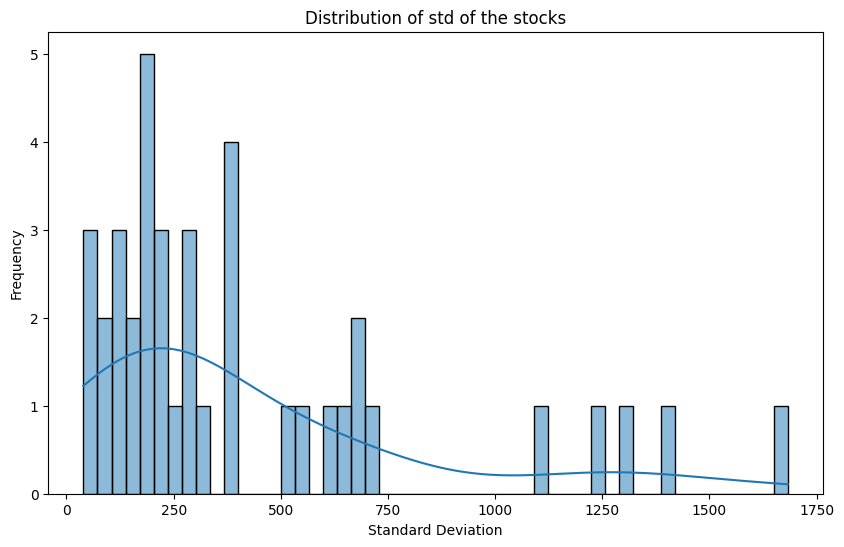

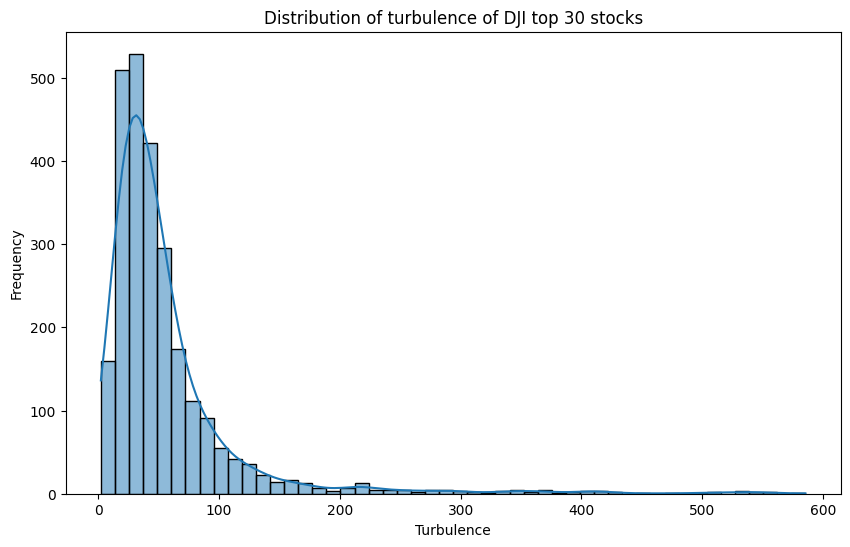

<Figure size 1500x500 with 0 Axes>

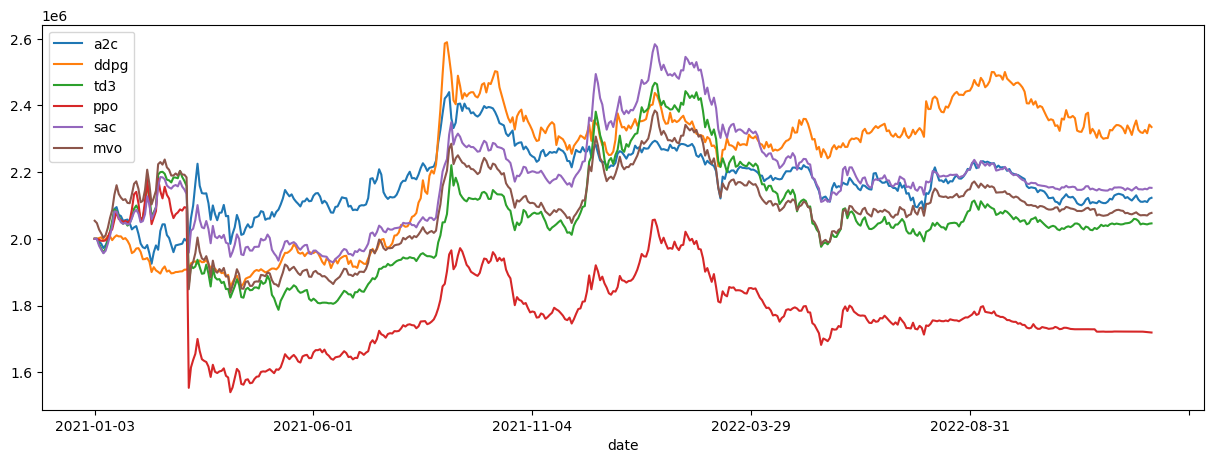

In [82]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [83]:
# make a table of initial and final value, annual return, sharpe ratio, max drawdown
# initial value
initial_value = result.iloc[0]
# final value
final_value = result.iloc[-1]
# annual return
annual_return = (final_value/initial_value)**(1/3) - 1
annual_return = annual_return * 100
# sharpe ratio
sharpe_ratio = annual_return / result.std()
# max drawdown
max_drawdown = (result - result.expanding().max()).min()
# combine all the metrics


In [84]:
# Calculate daily returns from the portfolio values
daily_returns = result.pct_change().dropna()

# Set target return (e.g., 0 for simplicity, or replace with a risk-free rate if needed)
target_return = 0

# Calculate downside deviation
downside_returns = daily_returns[daily_returns < target_return]  # Only returns below target
downside_deviation = np.sqrt((downside_returns**2).mean())  # Root mean square of negative returns

# Annual return (already calculated)
annual_return = (result.iloc[-1] / result.iloc[0])**(1/3) - 1
annual_return = annual_return * 100  # Convert to percentage

# Sortino Ratio
sortino_ratio = (annual_return - target_return) / downside_deviation

# # Create a DataFrame for Sortino Ratio
# sortino_ratio_df = pd.DataFrame(sortino_ratio, columns=['Sortino Ratio'])
# print(sortino_ratio_df)


In [85]:
metrics = pd.DataFrame([initial_value, final_value, annual_return, sharpe_ratio,sortino_ratio, max_drawdown], index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio','sortino_ratio', 'max_drawdown']).T
if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("NIFTY\df_account_value_a2c.csv")
    do_nothing = 0
else: # macOS/Linux
    metrics.to_csv("DSE/metrics_dse.csv")
print(metrics)

      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.122823e+06       2.006515      0.000021     269.202104   
ddpg   2.000000e+06  2.334894e+06       5.296126      0.000027     678.909194   
td3    2.000000e+06  2.046095e+06       0.762422      0.000005      62.879097   
ppo    2.000000e+06  1.719099e+06      -4.919750     -0.000037    -272.563381   
sac    2.000000e+06  2.152563e+06       2.480672      0.000017     280.440191   
mvo    2.053988e+06  2.077496e+06       0.380050      0.000003      31.166531   

       max_drawdown  
a2c  -352046.600000  
ddpg -372392.300000  
td3  -491454.600000  
ppo  -639437.546100  
sac  -472526.100000  
mvo  -402250.404111  


# Risk (Maximum Drawdown)
------------------------

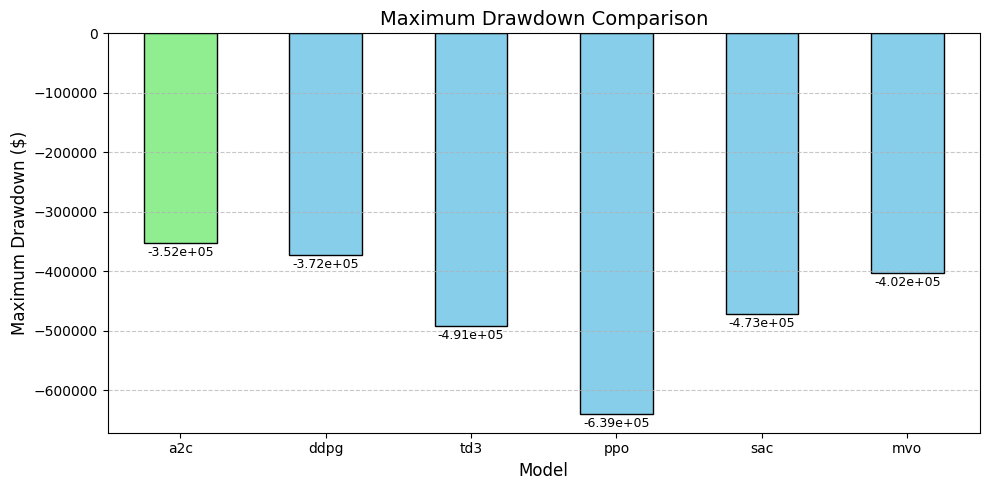

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved
# metrics = pd.read_csv("metrics_cashless_snp500.csv", index_col=0)

# Calculate the maximum drawdowns from metrics
max_drawdowns = metrics['max_drawdown']

# Identify the index of the minimum absolute drawdown
min_drawdown_index = max_drawdowns.abs().idxmin()

# Define bar colors: light green for the lowest drawdown, sky blue for others
colors = ['lightgreen' if index == min_drawdown_index else 'skyblue' for index in max_drawdowns.index]

# Plot the maximum drawdowns
plt.figure(figsize=(10, 5))
max_drawdowns.plot(kind='bar', color=colors, edgecolor='black')

# Add titles and labels
plt.title('Maximum Drawdown Comparison', fontsize=14)
plt.ylabel('Maximum Drawdown ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(max_drawdowns):
    # Adjust the position of the text by subtracting a small offset
    offset = -0.025 * max_drawdowns.abs().max()  # 5% of the max absolute value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('max_drawdown_comparison.png', dpi=300)
plt.show()


# Profitability
------------------

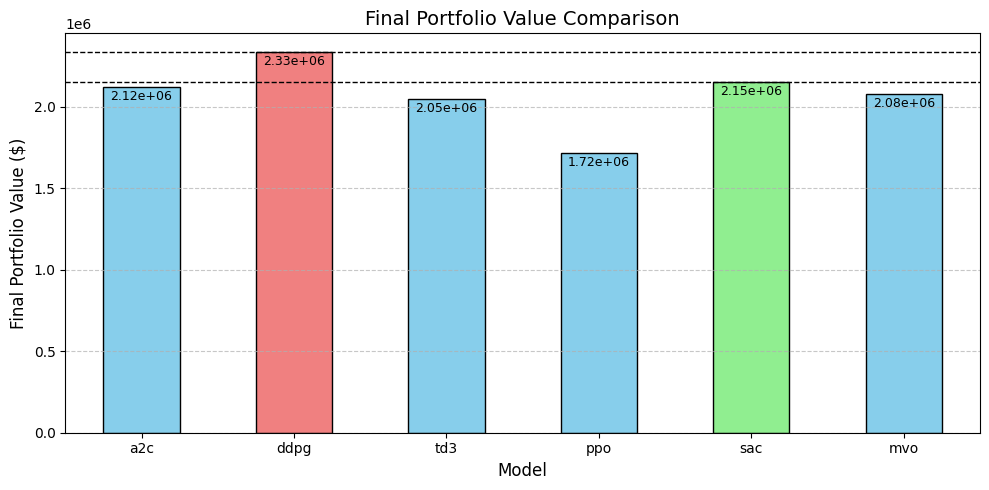

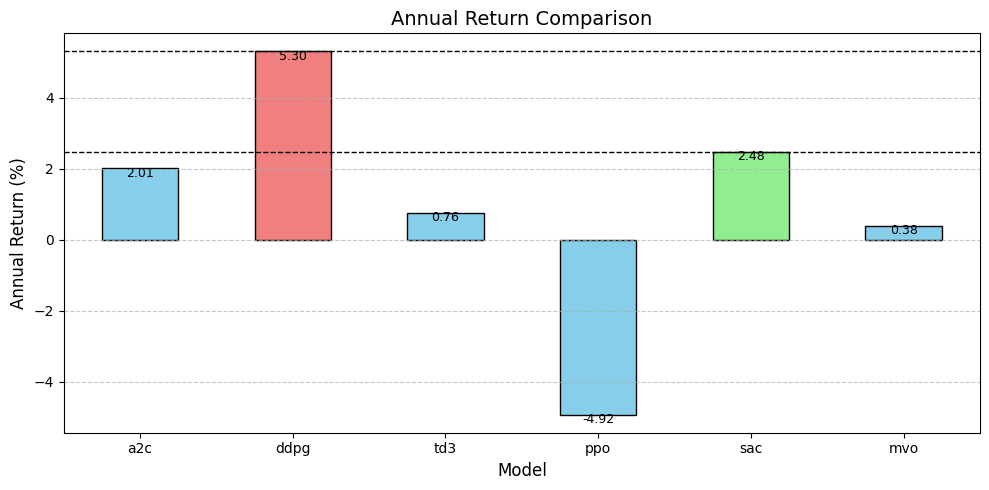

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved
# metrics = pd.read_csv("metrics_cashless_snp500.csv", index_col=0)

# Extract the final portfolio values and annual returns from metrics
final_values = metrics['final_value']
annual_returns = metrics['annual_return']

# Identify the index of the maximum and second maximum final value and annual return
max_final_value_index = final_values.idxmax()
second_max_final_value_index = final_values.nlargest(2).idxmin()
max_annual_return_index = annual_returns.idxmax()
second_max_annual_return_index = annual_returns.nlargest(2).idxmin()

# Define bar colors: light coral for the highest value, light green for the second highest, sky blue for others
colors_final_value = [
    'lightcoral' if index == max_final_value_index else 'lightgreen' if index == second_max_final_value_index else 'skyblue'
    for index in final_values.index
]
colors_annual_return = [
    'lightcoral' if index == max_annual_return_index else 'lightgreen' if index == second_max_annual_return_index else 'skyblue'
    for index in annual_returns.index
]

# Plot the final portfolio values
plt.figure(figsize=(10, 5))
final_values.plot(kind='bar', color=colors_final_value, edgecolor='black')

# Add titles and labels
plt.title('Final Portfolio Value Comparison', fontsize=14)
plt.ylabel('Final Portfolio Value ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(final_values):
    offset = -0.025 * final_values.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest final values
plt.axhline(y=final_values[max_final_value_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=final_values[second_max_final_value_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('final_value_comparison.png', dpi=300)
plt.show()

# Plot the annual returns
plt.figure(figsize=(10, 5))
annual_returns.plot(kind='bar', color=colors_annual_return, edgecolor='black')

# Add titles and labels
plt.title('Annual Return Comparison', fontsize=14)
plt.ylabel('Annual Return (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(annual_returns):
    offset = -0.025 * annual_returns.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest annual returns
plt.axhline(y=annual_returns[max_annual_return_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=annual_returns[second_max_annual_return_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('annual_return_comparison.png', dpi=300)
plt.show()


# Consistency (Volatility of Returns)
------------------------

In [88]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count the number of trading days per year
trading_days_per_year = df.groupby('year')['date'].nunique()

# Display the result
print(trading_days_per_year)


year
2009    243
2010    244
2011    229
2012    237
2013    238
2014    238
2015    244
2016    241
2017    248
2018    242
2019    237
2020    208
2021    240
2022    244
Name: date, dtype: int64


In [89]:
# Calculate daily returns
daily_returns = result.pct_change().dropna()

# Calculate annualized volatility
volatility = daily_returns.std() * np.sqrt(252)  # 252 trading days assumed for a year

# Add volatility to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility']
).T

# Save and display metrics
# metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)




      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.122823e+06       2.006515      0.000021     269.202104   
ddpg   2.000000e+06  2.334894e+06       5.296126      0.000027     678.909194   
td3    2.000000e+06  2.046095e+06       0.762422      0.000005      62.879097   
ppo    2.000000e+06  1.719099e+06      -4.919750     -0.000037    -272.563381   
sac    2.000000e+06  2.152563e+06       2.480672      0.000017     280.440191   
mvo    2.053988e+06  2.077496e+06       0.380050      0.000003      31.166531   

       max_drawdown  volatility  
a2c  -352046.600000    0.128975  
ddpg -372392.300000    0.138499  
td3  -491454.600000    0.173933  
ppo  -639437.546100    0.235473  
sac  -472526.100000    0.145566  
mvo  -402250.404111    0.172868  


In [90]:
# Calculate daily returns
daily_returns = result.pct_change().dropna()

# Calculate annualized volatility
volatility = daily_returns.std() * np.sqrt(252)  # 252 trading days assumed for a year

# Add volatility to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility']
).T

# Save and display metrics
# metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)




      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.122823e+06       2.006515      0.000021     269.202104   
ddpg   2.000000e+06  2.334894e+06       5.296126      0.000027     678.909194   
td3    2.000000e+06  2.046095e+06       0.762422      0.000005      62.879097   
ppo    2.000000e+06  1.719099e+06      -4.919750     -0.000037    -272.563381   
sac    2.000000e+06  2.152563e+06       2.480672      0.000017     280.440191   
mvo    2.053988e+06  2.077496e+06       0.380050      0.000003      31.166531   

       max_drawdown  volatility  
a2c  -352046.600000    0.128975  
ddpg -372392.300000    0.138499  
td3  -491454.600000    0.173933  
ppo  -639437.546100    0.235473  
sac  -472526.100000    0.145566  
mvo  -402250.404111    0.172868  


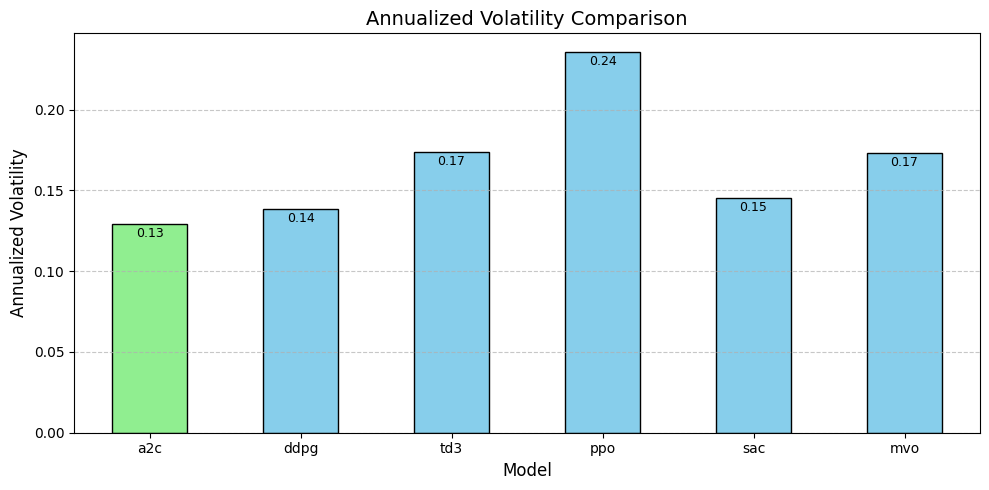

In [91]:
# Define bar colors: light green for the lowest value, sky blue for others
colors_volatility = ['lightgreen' if value == metrics['volatility'].min() else 'skyblue' for value in metrics['volatility']]

# Plot the volatility comparison
plt.figure(figsize=(10, 5))
metrics['volatility'].plot(kind='bar', color=colors_volatility, edgecolor='black')

# Add titles and labels
plt.title('Annualized Volatility Comparison', fontsize=14)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['volatility']):
    offset = -0.025 * metrics['volatility'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('volatility_comparison.png', dpi=300)
plt.show()


# Aggresiveness
--------------

In [92]:
# Calculate profitability
profitability = metrics['final_value'] - metrics['initial_value']

# Calculate aggressiveness
aggressiveness = profitability / metrics['max_drawdown']

# Add aggressiveness to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility, profitability, aggressiveness],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility', 'profitability', 'aggressiveness']
).T

# Save and display metrics
# metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)



      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.122823e+06       2.006515      0.000021     269.202104   
ddpg   2.000000e+06  2.334894e+06       5.296126      0.000027     678.909194   
td3    2.000000e+06  2.046095e+06       0.762422      0.000005      62.879097   
ppo    2.000000e+06  1.719099e+06      -4.919750     -0.000037    -272.563381   
sac    2.000000e+06  2.152563e+06       2.480672      0.000017     280.440191   
mvo    2.053988e+06  2.077496e+06       0.380050      0.000003      31.166531   

       max_drawdown  volatility  profitability  aggressiveness  
a2c  -352046.600000    0.128975  122822.710650       -0.348882  
ddpg -372392.300000    0.138499  334894.006600       -0.899304  
td3  -491454.600000    0.173933   46095.000250       -0.093793  
ppo  -639437.546100    0.235473 -280900.795550        0.439294  
sac  -472526.100000    0.145566  152563.082550       -0.322867  
mvo  -402250.404111    0.172868   23507.67

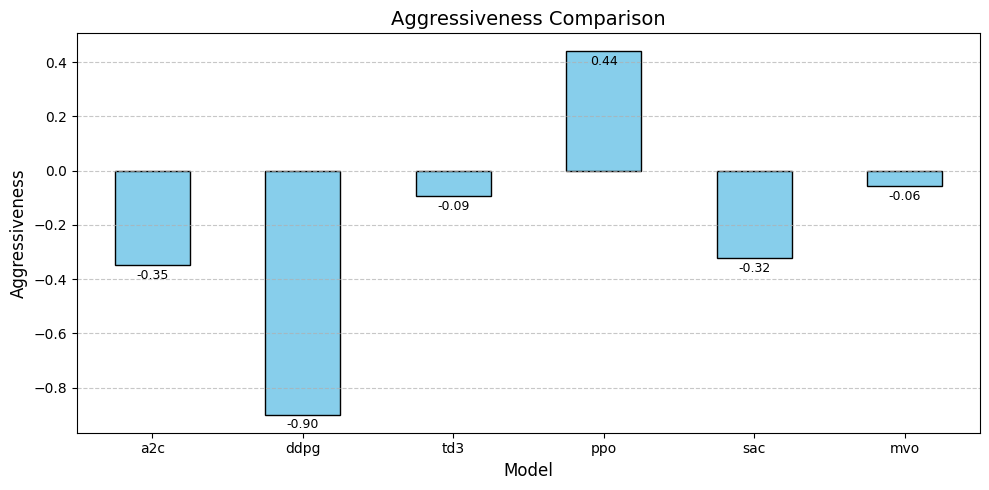

In [93]:
# Plot the aggressiveness comparison
plt.figure(figsize=(10, 5))
metrics['aggressiveness'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Aggressiveness Comparison', fontsize=14)
plt.ylabel('Aggressiveness', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['aggressiveness']):
    offset = -0.085 * metrics['aggressiveness'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('aggressiveness_comparison.png', dpi=300)
plt.show()


# Drawdown Recovery Time
-------------------------

In [94]:
# calculate drawdown recovery time for a2c using df_account_value_a2c

# 1. identift maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
recovery_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value].index[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value].index[0]

# 5. Find drawdown recovery time
drawdown_recovery_time = recovery_date - lowest_point_date

# 6. Display the dates
print(f"Lowest Point Date: {lowest_point_date}")
print(f"Recovery Date: {recovery_date}")

# 7. Display the drawdown and recovery time
print(f"Drawdown: {drawdown:.2f}")
print(f"Drawdown Recovery Time: {drawdown_recovery_time} days")








Lowest Point Date: 26
Recovery Date: 162
Drawdown: 514318.83
Drawdown Recovery Time: 136 days


In [95]:
from datetime  import datetime

# 1. Identifying maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. Calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
highest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value]['date'].iloc[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value]['date'].iloc[0]

# 5. Find drawdown recovery time (in days)

# Convert strings to datetime objects
highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')
# Calculate the difference in days
days_difference = (highest_point_date_dt - lowest_point_date_dt).days

print(f"Lowest Point Date: {lowest_point_date}")
print(f"Highest Point Date: {highest_point_date}")
print(f"Drawdown Recovery Time: {days_difference} days")


Lowest Point Date: 2021-02-08
Highest Point Date: 2021-09-12
Drawdown Recovery Time: 216 days


In [96]:
from datetime import datetime

def calculate_recovery_time(arg_df, algorithm_name):
    

    # 1. Identifying maximum and minimum portfolio value
    max_portfolio_value = arg_df['account_value'].max()
    min_portfolio_value = arg_df['account_value'].min()

    # 2. Calculate drawdown
    drawdown = max_portfolio_value - min_portfolio_value

    # 3. Find recovery date
    highest_point_date = arg_df[arg_df['account_value'] == max_portfolio_value]['date'].iloc[0]


    # 4. Find lowest point date
    lowest_point_date = arg_df[arg_df['account_value'] == min_portfolio_value]['date'].iloc[0]

    # 5. Find drawdown recovery time (in days)
    highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
    lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')

    # Calculate the difference in days
    drt = (highest_point_date_dt - lowest_point_date_dt).days

    return {
        'algorithm': algorithm_name,
        'drawdown': drawdown,
        'max_portfolio_value': max_portfolio_value,
        'highest_point_date': highest_point_date,
        'min_portfolio_value': min_portfolio_value,
        'lowest_point_date': lowest_point_date,
        'recovery_time': drt
    }

# Example usage for PPO
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
print(ppo_recovery)



{'algorithm': 'ppo', 'drawdown': 639437.5460999999, 'max_portfolio_value': 2179581.620800001, 'highest_point_date': '2021-02-11', 'min_portfolio_value': 1540144.0747000012, 'lowest_point_date': '2021-04-04', 'recovery_time': -52}


In [97]:

copy_result = result.copy()
df_account_value_mvo_temp = copy_result.drop(columns=['a2c', 'ddpg', 'td3', 'ppo', 'sac'])
df_account_value_mvo_temp 


,mvo
date,
2021-01-03,2.053988e+06
2021-01-04,2.047058e+06
2021-01-05,2.027858e+06
2021-01-06,2.015981e+06
2021-01-07,2.002719e+06
...,...
2022-12-22,2.070858e+06
2022-12-26,2.070822e+06
2022-12-27,2.069780e+06


In [98]:
df_account_value_mvo = df_account_value_mvo_temp.reset_index()  # Reset the index to convert dates to a column
df_account_value_mvo.columns = ['date', 'account_value']  # Rename the columns
df_account_value_mvo

,date,account_value
0,2021-01-03,2.053988e+06
1,2021-01-04,2.047058e+06
2,2021-01-05,2.027858e+06
3,2021-01-06,2.015981e+06
4,2021-01-07,2.002719e+06
...,...,...
479,2022-12-22,2.070858e+06
480,2022-12-26,2.070822e+06
481,2022-12-27,2.069780e+06
482,2022-12-28,2.075279e+06


In [99]:
a2c_recovery = calculate_recovery_time(df_account_value_a2c, 'a2c')
ddpg_recovery = calculate_recovery_time(df_account_value_ddpg, 'ddpg')
td3_recovery = calculate_recovery_time(df_account_value_td3, 'td3')
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
sac_recovery = calculate_recovery_time(df_account_value_sac, 'sac')
mvo_recovery = calculate_recovery_time(df_account_value_mvo, 'mvo')

# Display the recovery time for each model
print(a2c_recovery)
print(ddpg_recovery)
print(td3_recovery)
print(ppo_recovery)
print(sac_recovery)
print(mvo_recovery)


{'algorithm': 'a2c', 'drawdown': 514318.83420000016, 'max_portfolio_value': 2439566.6106500006, 'highest_point_date': '2021-09-12', 'min_portfolio_value': 1925247.7764500005, 'lowest_point_date': '2021-02-08', 'recovery_time': 216}
{'algorithm': 'ddpg', 'drawdown': 733682.3000000003, 'max_portfolio_value': 2589027.206600001, 'highest_point_date': '2021-09-09', 'min_portfolio_value': 1855344.9066000008, 'lowest_point_date': '2021-04-04', 'recovery_time': 158}
{'algorithm': 'td3', 'drawdown': 680303.9000000001, 'max_portfolio_value': 2467399.30025, 'highest_point_date': '2022-01-24', 'min_portfolio_value': 1787095.4002499997, 'lowest_point_date': '2021-05-05', 'recovery_time': 264}
{'algorithm': 'ppo', 'drawdown': 639437.5460999999, 'max_portfolio_value': 2179581.620800001, 'highest_point_date': '2021-02-11', 'min_portfolio_value': 1540144.0747000012, 'lowest_point_date': '2021-04-04', 'recovery_time': -52}
{'algorithm': 'sac', 'drawdown': 653627.8999999999, 'max_portfolio_value': 258303

In [100]:
# make a array of all the recovery time
recovery_times = [a2c_recovery['recovery_time'], ddpg_recovery['recovery_time'], td3_recovery['recovery_time'], ppo_recovery['recovery_time'], sac_recovery['recovery_time'], mvo_recovery['recovery_time']]
recovery_times

[216, 158, 264, -52, 224, 295]

In [101]:
metrics['recovery_time'] = recovery_times
# metrics.to_csv("metrics_cashless_snp500.csv")

metrics 

,initial_value,final_value,annual_return,sharpe_ratio,sortino_ratio,max_drawdown,volatility,profitability,aggressiveness,recovery_time
a2c,2.000000e+06,2.122823e+06,2.006515,0.000021,269.202104,-352046.600000,0.128975,122822.710650,-0.348882,216
ddpg,2.000000e+06,2.334894e+06,5.296126,0.000027,678.909194,-372392.300000,0.138499,334894.006600,-0.899304,158
td3,2.000000e+06,2.046095e+06,0.762422,0.000005,62.879097,-491454.600000,0.173933,46095.000250,-0.093793,264
ppo,2.000000e+06,1.719099e+06,-4.919750,-0.000037,-272.563381,-639437.546100,0.235473,-280900.795550,0.439294,-52
sac,2.000000e+06,2.152563e+06,2.480672,0.000017,280.440191,-472526.100000,0.145566,152563.082550,-0.322867,224
mvo,2.053988e+06,2.077496e+06,0.380050,0.000003,31.166531,-402250.404111,0.172868,23507.672276,-0.058440,295


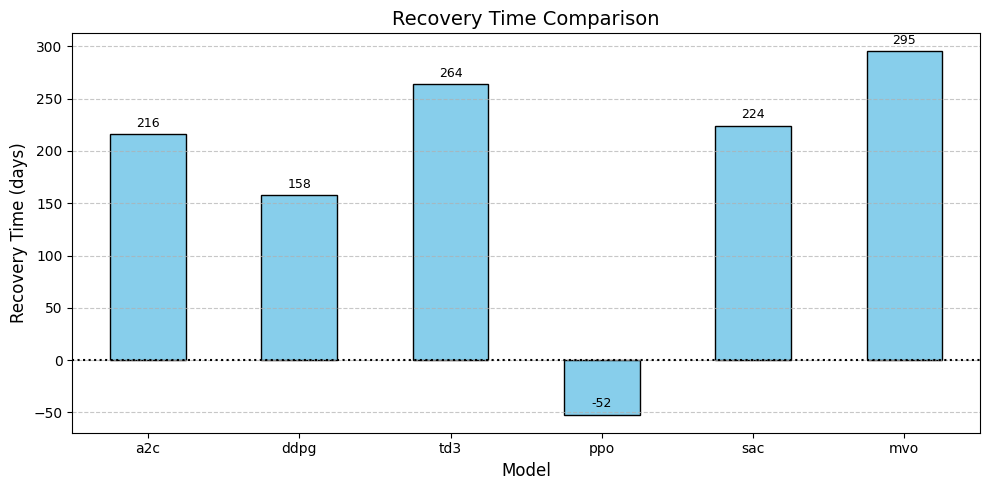

In [102]:
# Plot the recovery time comparison
plt.figure(figsize=(10, 5))
metrics['recovery_time'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Recovery Time Comparison', fontsize=14)
plt.ylabel('Recovery Time (days)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['recovery_time']):
    offset = 0.035 * metrics['recovery_time'].max()  # 3.5% of the max value as offset
    plt.text(index, value + offset, f'{value}', ha='center', va='center', fontsize=9)

# Add a red dotted line across y=0
plt.axhline(y=0, color='black', linestyle='dotted', linewidth=1.5)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('recovery_time_comparison.png', dpi=300)
plt.show()


# HeatMap
----------

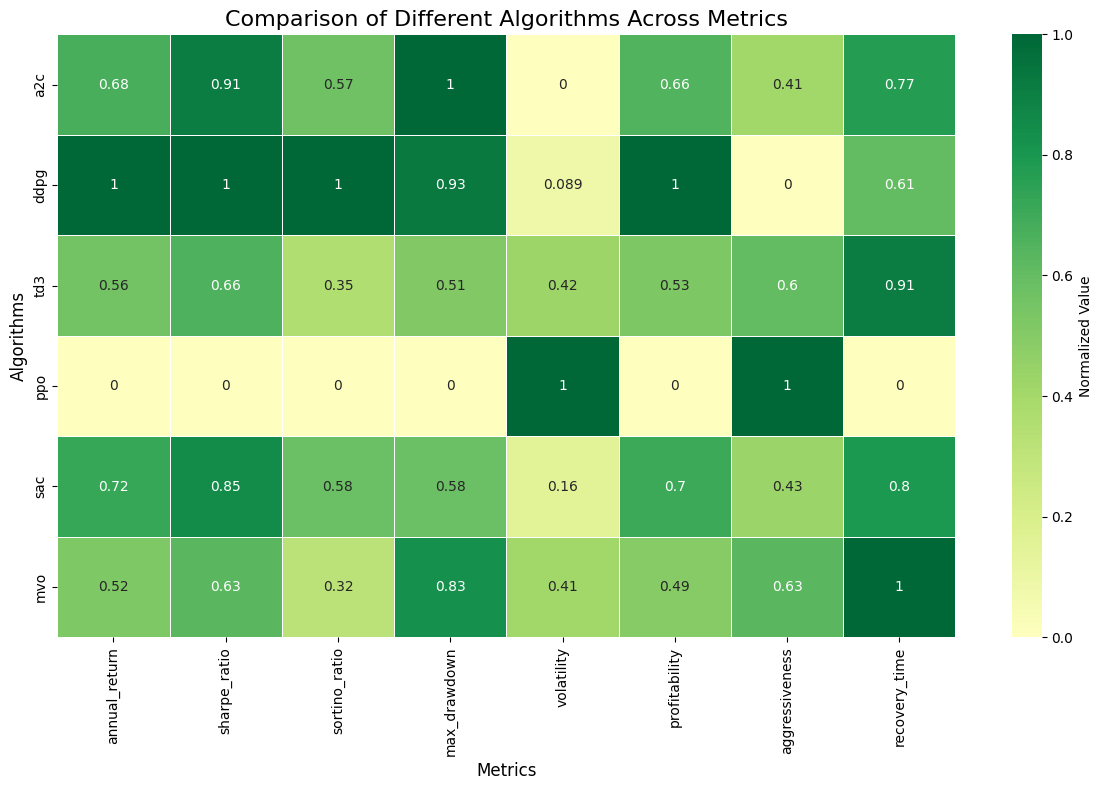

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created
# metrics = pd.read_csv("metrics_cashless_snp500.csv")

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']]

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


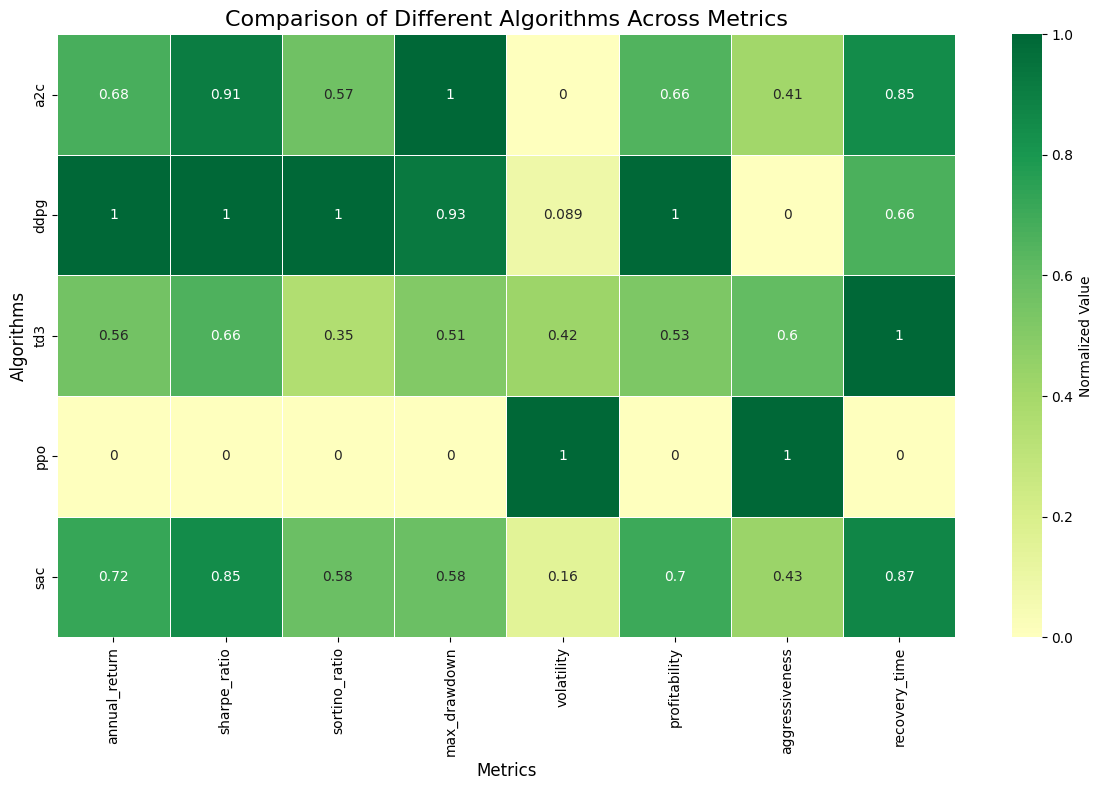

In [104]:
# create the same heatmap but without the mvo model

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']].drop('mvo')

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


# Radar Plot
----------------

In [105]:
print(metrics) 
# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

metrics_subset = metrics.loc[algorithms, ['final_value','annual_return', 'sharpe_ratio', 'sortino_ratio', 
                                          'max_drawdown', 'volatility', 'profitability', 
                                          'aggressiveness', 'recovery_time']]

metrics_subset



      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.122823e+06       2.006515      0.000021     269.202104   
ddpg   2.000000e+06  2.334894e+06       5.296126      0.000027     678.909194   
td3    2.000000e+06  2.046095e+06       0.762422      0.000005      62.879097   
ppo    2.000000e+06  1.719099e+06      -4.919750     -0.000037    -272.563381   
sac    2.000000e+06  2.152563e+06       2.480672      0.000017     280.440191   
mvo    2.053988e+06  2.077496e+06       0.380050      0.000003      31.166531   

       max_drawdown  volatility  profitability  aggressiveness  recovery_time  
a2c  -352046.600000    0.128975  122822.710650       -0.348882            216  
ddpg -372392.300000    0.138499  334894.006600       -0.899304            158  
td3  -491454.600000    0.173933   46095.000250       -0.093793            264  
ppo  -639437.546100    0.235473 -280900.795550        0.439294            -52  
sac  -472526.100000    0.145566 

,final_value,annual_return,sharpe_ratio,sortino_ratio,max_drawdown,volatility,profitability,aggressiveness,recovery_time
a2c,2.122823e+06,2.006515,0.000021,269.202104,-352046.600000,0.128975,122822.710650,-0.348882,216
ddpg,2.334894e+06,5.296126,0.000027,678.909194,-372392.300000,0.138499,334894.006600,-0.899304,158
td3,2.046095e+06,0.762422,0.000005,62.879097,-491454.600000,0.173933,46095.000250,-0.093793,264
ppo,1.719099e+06,-4.919750,-0.000037,-272.563381,-639437.546100,0.235473,-280900.795550,0.439294,-52
sac,2.152563e+06,2.480672,0.000017,280.440191,-472526.100000,0.145566,152563.082550,-0.322867,224
mvo,2.077496e+06,0.380050,0.000003,31.166531,-402250.404111,0.172868,23507.672276,-0.058440,295


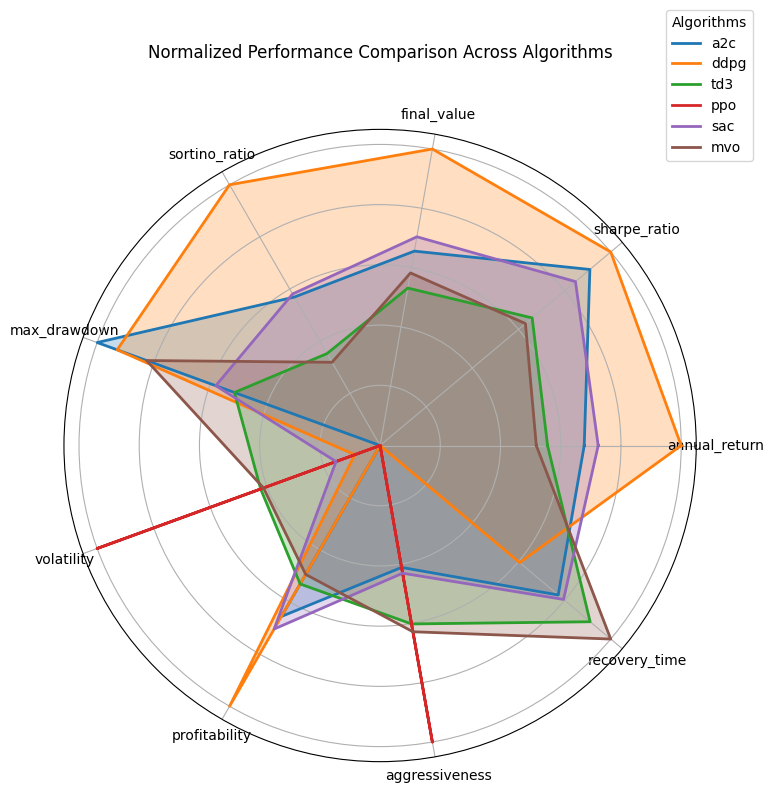

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

# Extract metrics for all algorithms
metrics_subset = metrics.loc[algorithms, ['annual_return', 'sharpe_ratio'   , 'final_value', 
                                          'sortino_ratio', 'max_drawdown'   , 'volatility', 
                                          'profitability', 'aggressiveness' , 'recovery_time']]

# Normalize metrics
metrics_norm = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Number of variables
num_vars = len(metrics_norm.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each algorithm
for algo, color in zip(algorithms, colors):
    metrics_values = metrics_norm.loc[algo].values.tolist()
    metrics_values += metrics_values[:1]  # Close the circle

    # Plot
    ax.plot(angles, metrics_values, linewidth=2, linestyle='solid', color=color, label=algo)

    # Fill area
    ax.fill(angles, metrics_values, color=color, alpha=0.25)

# Customize
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_norm.columns.tolist(), fontsize=10)

# Legend with adjusted position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.20), fontsize=10, title="Algorithms")

# Title
plt.title('Normalized Performance Comparison Across Algorithms', fontsize=12, y=1.10)

# Show plot
plt.tight_layout()
plt.show()
